In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
all_data = pd.read_csv('/home/eli/Eli/Projects/gator/models/data/timinig_resnet_50_edges_7_runs_batch_32.csv', header=None)
all_data.columns = ['edge', 'flops_percent', 'ms']
orig = all_data[all_data.edge == 0].ms.values
edges = all_data[all_data.edge != 0]
# orig_runs =
# edges = pd.read_csv('/home/eli/Eli/performance_calc/resnet50_timing/timing_resnet_50_hyper_edges_only.csv', index_col=0)
# edges=edges[1:]

In [10]:
def outlier_filter(ar):
    return ar[np.absolute(ar-ar.mean()) / ar.std() < 1.5]

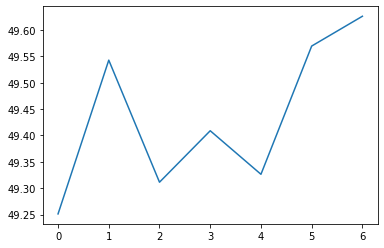

In [27]:
# plt.plot(all_data[all_data.edge == 11].ms.values)

In [40]:
orig_filtered = outlier_filter(orig)
mean, std = orig_filtered.mean(), orig_filtered.std()
median, medain_unfilterd = np.median(orig_filtered), np.median(orig)
min_v = orig.min()
mean, std, medain, medain_unfilterd, min_v 

(49.85123333333333, 0.06557272468200631, 49.83785, 49.8283, 49.54)

In [41]:

print("{:2d} {:7.4f} {:7.4f} {:6.2f}".format(len(orig_filtered), mean, std, 100))
reduction = []
rel_factor= []

for i in range(1, edges.edge.max()+1):
    d = edges[edges.edge==i]
    vals = d.ms.values
    vals_filtered = d[np.absolute(vals-vals.mean()) / vals.std() < 1.5]
    vals_mean = vals_filtered.ms.mean()
#     vals_mean = np.median(vals_filtered)
#     mean = median
    vals_std = vals_filtered.ms.std()
    diffs = (mean - vals_mean) / mean
    print("{:2d}, {:7.4f}, {:7.4f}, {:6.2f}, {:7.4f}, {:8.4f}, {:8.4f}, {:6.2f}, {:7.4f}, {:7.4f}".format(len(vals_filtered), 
                                                                         vals_mean, 
                                                                         vals_std, 
                                                                         vals_filtered.iloc[0].flops_percent, 
                                                                         mean - vals_mean,
                                                                         (mean - vals_mean)/ vals_filtered.ms.std(),
                                                                         (mean - vals_mean)/ std,
                                                                         100 - vals_filtered.iloc[0].flops_percent, 
                                                                         100 * diffs,
                                                                         100 * (diffs) / (100 - vals_filtered.iloc[0].flops_percent)))
    reduction.append(100 * diffs)
    rel_factor.append(100 * diffs / (100 - vals_filtered.iloc[0].flops_percent))
reduction = np.array(reduction)
rel_factor = np.array(rel_factor)

 6 49.8512  0.0656 100.00
 6, 48.4572,  0.0562,  97.64,  1.3941,  24.7836,  21.2596,   2.36,  2.7964,  1.1834
 5, 49.5523,  0.0478,  98.33,  0.2989,   6.2597,   4.5588,   1.67,  0.5997,  0.3600
 6, 49.3362,  0.1115,  97.83,  0.5150,   4.6209,   7.8544,   2.17,  1.0331,  0.4771
 6, 49.5388,  0.0642,  97.83,  0.3124,   4.8638,   4.7647,   2.17,  0.6267,  0.2894
 5, 49.3035,  0.0211,  97.83,  0.5478,  26.0207,   8.3534,   2.17,  1.0988,  0.5074
 6, 49.4638,  0.0414,  97.83,  0.3875,   9.3475,   5.9087,   2.17,  0.7772,  0.3589
 6, 49.3122,  0.0791,  97.83,  0.5390,   6.8124,   8.2204,   2.17,  1.0813,  0.4994
 6, 44.7505,  0.0591,  94.34,  5.1007,  86.3274,  77.7877,   5.66, 10.2319,  1.8068
 7, 47.3537,  0.1420,  98.17,  2.4975,  17.5940,  38.0880,   1.83,  5.0100,  2.7344
 6, 48.8307,  0.0431,  97.83,  1.0205,  23.6877,  15.5626,   2.17,  2.0471,  0.9454
 7, 49.4337,  0.1458,  97.83,  0.4175,   2.8631,   6.3673,   2.17,  0.8375,  0.3868
 6, 49.4229,  0.0925,  97.83,  0.4284,   4.6314,  

In [42]:
pd.DataFrame(reduction).to_csv('/home/eli/Eli/Projects/pytorch_classifier/models/data/resnet_50_hyper_edge_recution_batch32.csv', index=None, header=None)
pd.DataFrame(rel_factor).to_csv('/home/eli/Eli/Projects/pytorch_classifier/models/data/resnet_50_hyper_edge_rel_factor_batch32.csv', index=None, header=None)

In [67]:
filtered_orig = np.absolute(orig - orig.mean()) / orig.std() > 1

array([ True, False, False, False, False, False, False, False, False])

In [43]:
mean, std = orig_net.mean().values[0], orig_net.std().values[0]
mean, std

(13.810100788574221, 0.02098299012842933)

In [44]:
edges.columns

Index(['flops_percent', 'ms'], dtype='object')

In [49]:
edges['decrease'] = 100-edges.flops_percent
# edges['rel_decrease'] = 100*(100-edges.flops_percent / 100
edges['diff_ms'] = mean - edges.ms
edges['rel_ms'] = 100*(1-edges.ms/mean)
edges['real_to_theoretical'] = edges.rel_ms/edges.decrease
edges

,flops_percent,ms,decrease,diff_ms,rel_ms,real_to_theoretical
edge_prune_0_5,,,,,,
1,97.6369,13.4497,2.3631,0.360401,2.609690,1.104350
2,98.3344,13.7529,1.6656,0.057201,0.414195,0.248676
3,97.8347,13.6762,2.1653,0.133901,0.969586,0.447784
4,97.8347,13.6871,2.1653,0.123001,0.890658,0.411332
5,97.8347,13.6518,2.1653,0.158301,1.146268,0.529381
6,97.8347,13.7303,2.1653,0.079801,0.577844,0.266865
7,97.8347,13.6747,2.1653,0.135401,0.980448,0.452800
8,94.3369,12.5015,5.6631,1.308601,9.475679,1.673232
9,98.1678,13.5863,1.8322,0.223801,1.620559,0.884488


In [117]:
edges['real_to_theoretical'].sum()

KeyError: 'real_to_theoretical'